# Permutation tests for comparing two groups


Click [here](https://mybinder.org/v2/gh/minireference/noBSstats/HEAD?urlpath=%2Fdoc%2Ftree%2Fblogposts%2Fpermutation_test.ipynb)
to run the notebook interactively,
so you can play with the code examples.

### Notebook setup

In [1]:
# Install stats library
%pip install --quiet ministats 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (7, 2)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

import numpy as np
np.set_printoptions(legacy='1.25')

def savefig(fig, filename):
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

<Figure size 640x480 with 0 Axes>

## Introduction

The *permutation tests* for comparing two groups is another example of the computational approach to statistics. The permutation test uses a randomization strategy on the data to generate samples from a hypothetical distribution that represents the "no difference between groups" scenario. The procedure of generating repeated samples from the "no difference" distribution is called a permutation test.

The permutation test is an example of the hypothesis testing procedure. Classical statistics approaches the comparison of two groups by relying on pre-packaged procedures like the Welch's two-sample t-test, which makes assumptions that the populations are normally distributed and uses complicated math formulas (analytical approximations). In contrast, the permutation test allows us to compare two groups without making assumptions about the populations' distribution.


### Statistical inference

TODO: improt short version from [simulation_hypothesis_tests.ipynb](./simulation_hypothesis_tests.ipynb)


## Permutation test

TODO: import from blog post and slides

Suppose we have a obtained samples from group of students who took the smart drug `treated`,
and a similar group who didn't take the smart drug `controls`.

In [3]:
# data

treated = [92.69, 117.15, 124.79, 100.57, 104.27, 121.56, 104.18,
           122.43, 98.85, 104.26, 118.56, 138.98, 101.33, 118.57, 
           123.37, 105.9, 121.75, 123.26, 118.58, 80.03, 121.15, 
           122.06, 112.31, 108.67, 75.44, 110.27, 115.25, 125.57,
           114.57, 98.09, 91.15, 112.52, 100.12, 115.2, 95.32, 
           121.37, 100.09, 113.8, 101.73, 124.9, 87.83, 106.22, 
           99.97, 107.51, 83.99, 98.03, 71.91, 109.99, 90.83, 105.48]

controls = [85.1, 84.05, 90.43, 115.92, 97.64, 116.41, 68.88, 110.51, 
            125.12, 94.04, 134.86, 85.0, 91.61, 69.95, 94.51, 81.16, 
            130.61, 108.93, 123.38, 127.69, 83.36, 76.97, 124.87, 86.36, 
            105.71, 93.01, 101.58, 93.58, 106.51, 91.67, 112.93, 88.74, 
            114.05, 80.32, 92.91, 85.34, 104.01, 91.47, 109.2, 104.04, 
            86.1, 91.52, 98.5, 94.62, 101.27, 107.41, 100.68, 114.94, 
            88.8, 121.8]


We'll compare the IQ scores in the two groups
in terms of the difference between the average scores computed from each group.

In [4]:
def mean(sample):
    return sum(sample) / len(sample)

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

In [5]:
# Calculate the observed difference between means
dscore = dmeans(treated, controls)
dscore

7.8870000000000005

### Statistical question?

Are the two groups the same?
This is equivalent to saying the smart drug had no effect.

### Disproving the skeptical colleague

We'll now use the `10000` permutations of the original data
to obtain sampling distribution of the difference between means under the null hypothesis.

In [6]:
import numpy as np
np.random.seed(43)

pdhats = []
for i in range(0, 10000):
    all_iqs = np.concatenate((treated, controls))
    pall_iqs = np.random.permutation(all_iqs)
    ptreated = pall_iqs[0:len(treated)]
    pcontrols = pall_iqs[len(treated):]
    pdhat = dmeans(ptreated, pcontrols)
    pdhats.append(pdhat)

Compute the p-value of the observed difference between means `dscore` under the null hypothesis.

In [7]:
tails = [d for d in pdhats if abs(d) > dscore]
pvalue = len(tails) / len(pdhats)
pvalue

0.0101

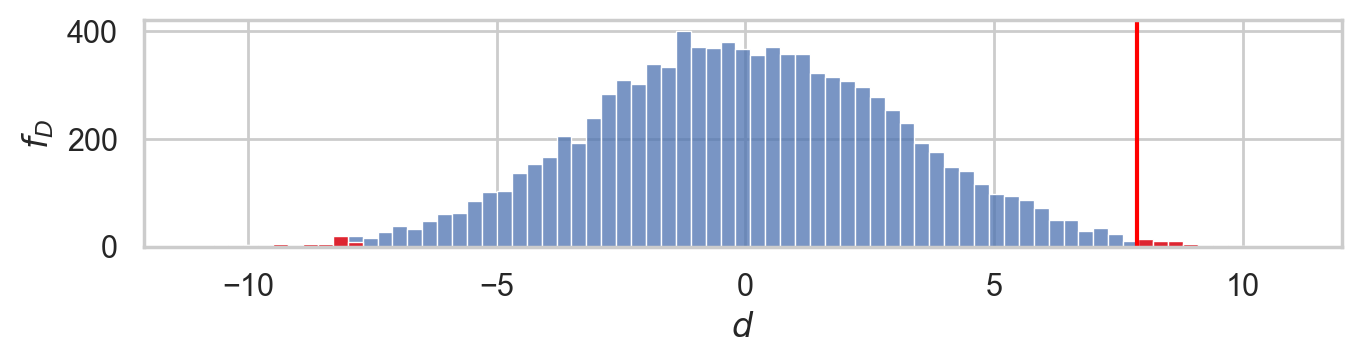

In [8]:
bins = np.arange(-11, 11, 0.3)

# plot the sampling distribution in blue
ax = sns.histplot(pdhats, bins=bins)

# plot red line for the observed statistic
plt.axvline(dscore, color="red")

# plot the values that are equal or more extreme in red
sns.histplot(tails, ax=ax, bins=bins, color="red")
ax.set_xlabel("$d$")
ax.set_ylabel("$f_{D}$")

savefig(plt.gcf(), "figures/pvalue_viz_permutation_test_iqs.png")

#### Alternative using formula

In [9]:
from ministats import ttest_dmeans
ttest_dmeans(treated, controls)

0.010163611652137501

#### Alternative using predefined function

In [10]:
from scipy.stats import permutation_test

res = permutation_test([treated, controls], statistic=dmeans)
res.statistic, res.pvalue

(7.886999999999972, 0.0108)

## Conclusion

Hands-on computational methods are much better compared to formulas and theory: no need to memorize formulas, which makes it easier for beginners, because the computations are directly connected with definition. Learners need less math theory, and get more practical experience. Furthermore, the resampling tests are more general, since they don't require assumptions about specific population distribution.


## Links

- Previous blog posts on statistics:
  - [Outline of the stats curriculum research](https://minireference.com/blog/fixing-the-introductory-statistics-curriculum/)
  - [Book proposal](https://minireference.com/blog/no-bullshit-guide-to-statistics-progress-update/)
  - [Stats survey results](https://minireference.com/blog/what-stats-do-people-want-to-learn/)
  - [Python for statistics](https://minireference.com/blog/python-for-stats/)
- Good talks:
  - [There's Only One Test](https://www.youtube.com/watch?v=S41zQEshs5k) talk by Allen B. Downey
  - [Statistics for Hackers](https://www.youtube.com/watch?v=Iq9DzN6mvYA) talk by Jake Vanderplas  
- SciPy function for permutation tests:
  - [scipy.stats.permutation\_test](https://docs.scipy.org/doc//scipy/reference/generated/scipy.stats.permutation_test.html)